In [1]:
import spgci as ci
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

In [2]:
fc = ci.ForwardCurves()

## Finding curve codes

In [3]:
brent_curves = fc.get_curves(q="Brent Financial", commodity="Crude oil")
brent_curves.head(15)

,commodity,contract_type,currency,curve_code,curve_name,curve_type,delivery_region,derivative_maturity_frequency,holiday_schedule,mdc,mdc_description,uom
0,Crude oil,Swap,USD,CN0PX,Dated Brent at Spore MOC Financial,Relative Forward Curve,North Sea,"[Month, Quarter, Year]",CALSG00,[QDA],[M2M: Oil Forward Curves Asia up to 36 months],BBL
1,Crude oil,Swap,USD,CN0NX,Brent Frontline vs Dubai Frontline at Spore MO...,Relative Forward Curve,North Sea,"[Month, Year, Quarter]",CALSG00,[DA],[Derivatives: Petroleum Asia],BBL
2,Crude oil,Swap,USD,CN0NW,Brent Frontline at Spore MOC Financial Time Sp...,Relative Forward Curve,North Sea,"[Month, Year, Quarter]",CALSG00,[DA],[Derivatives: Petroleum Asia],BBL
3,Crude oil,Swap,USD,CN0NV,Brent Frontline at Spore MOC Financial,Relative Forward Curve,North Sea,"[Month, Year, Quarter]",CALSG00,[DA],[Derivatives: Petroleum Asia],BBL
4,Crude oil,Swap,USD,CN05O,Dated Brent at Houston MOC Financial,Relative Forward Curve,North Sea,"[Quarter, Month, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
5,Crude oil,Swap,USD,CN05I,WTI Frontline vs Brent Frontline at Houston MO...,Relative Forward Curve,Cushing,"[Quarter, Month, Year]",CALUS00,[DU],[Derivatives: Petroleum Americas],BBL
6,Crude oil,Swap,USD,CN03W,Brent Frontline at Houston MOC Financial Time ...,Relative Forward Curve,North Sea,"[Month, Quarter, Year]",CALUS00,[DU],[Derivatives: Petroleum Americas],BBL
7,Crude oil,Swap,USD,CN03V,Brent Frontline at Houston MOC Financial,Relative Forward Curve,North Sea,"[Quarter, Month, Year]",CALUS00,[DU],[Derivatives: Petroleum Americas],BBL
8,Crude oil,Swap,USD,CN01Y,WTI Frontline vs Brent Frontline at London MOC...,Relative Forward Curve,Cushing,"[Month, Quarter, Year]",CALLN00,[DR],[Derivatives: Petroleum EMEA],BBL
9,Crude oil,Swap,USD,CN006,Dated Brent Financial,Relative Forward Curve,North Sea,"[Week, Year, Month, Quarter]",CALLN00,"[CRU, DR]","[MI Crude, Derivatives: Petroleum EMEA]",BBL


In [4]:
dbf = brent_curves.iloc[9]
print(dbf)

commodity                                                      Crude oil
contract_type                                                       Swap
currency                                                             USD
curve_code                                                         CN006
curve_name                                         Dated Brent Financial
curve_type                                        Relative Forward Curve
delivery_region                                                North Sea
derivative_maturity_frequency               [Week, Year, Month, Quarter]
holiday_schedule                                                 CALLN00
mdc                                                            [CRU, DR]
mdc_description                  [MI Crude, Derivatives: Petroleum EMEA]
uom                                                                  BBL
Name: 9, dtype: object


## Getting latest assessments for specific curve, plotting


In [5]:
df = fc.get_assessments(curve_code=dbf['curve_code'], derivative_maturity_frequency=fc.MatFrequency.Month)
df.head()

,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,bate
0,BDLM001,CN006,Dated Brent Financial,Month,1.0,2023-03-01,2023-03-31,APR 2023,2023-03-01,82.73,c
1,BDLM002,CN006,Dated Brent Financial,Month,2.0,2023-04-03,2023-04-28,MAY 2023,2023-03-01,82.38,c
2,BDLM003,CN006,Dated Brent Financial,Month,3.0,2023-05-02,2023-05-31,JUN 2023,2023-03-01,82.06,c
3,BDLM004,CN006,Dated Brent Financial,Month,4.0,2023-06-01,2023-06-30,JUL 2023,2023-03-01,81.69,c
4,BDLM005,CN006,Dated Brent Financial,Month,5.0,2023-07-03,2023-07-31,AUG 2023,2023-03-01,81.28,c


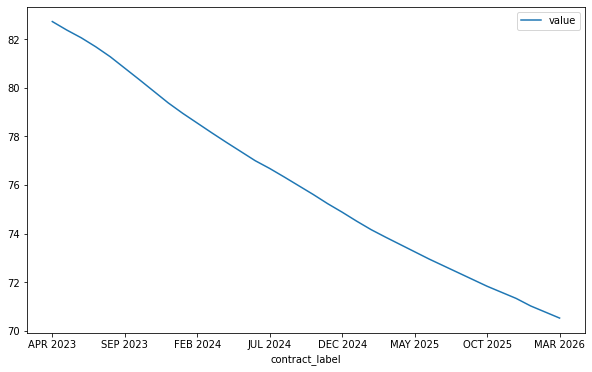

In [6]:
df = df.sort_values("derivative_position", ascending=True)
df.plot(x="contract_label", y="value", figsize=(10, 6));

## Multiple curves (single date), joing with ref data, pivoting, plotting

In [7]:
curves_240 = fc.get_curves(mdc="QDG", commodity="Crude oil")
curves_240.head()

,commodity,contract_type,currency,curve_code,curve_name,curve_type,delivery_region,derivative_maturity_frequency,holiday_schedule,mdc,mdc_description,uom
0,Crude oil,Swap,USD,CN2RJ,Mars M2M Financial,Relative Forward Curve,Clovelly,[Month],CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
1,Crude oil,Swap,USD,CN2GP,Magellan East Houston M2M Financial,Relative Forward Curve,Houston,[Month],CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
2,Crude oil,Swap,USD,CN0RO,WTI Midland Financial,Relative Forward Curve,Midland,[Month],CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
3,Crude oil,Swap,USD,CN0Q1,WTI Frontline at Spore MOC Financial,Relative Forward Curve,Cushing,"[Month, Year, Quarter]",CALSG00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
4,Crude oil,Swap,USD,CN06D,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL


In [8]:
df_multicurve = fc.get_assessments(curve_code=curves_240.iloc[:5]['curve_code'], derivative_maturity_frequency="Month")
df_multicurve.head()

,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,bate
0,QWTSP01,CN06D,West Texas Sour Crude Financial,Month,1.0,2023-03-01,2023-03-31,APR 2023,2023-02-28,77.150,c
1,QWTSP02,CN06D,West Texas Sour Crude Financial,Month,2.0,2023-04-03,2023-04-28,MAY 2023,2023-02-28,77.190,c
2,QWTSP03,CN06D,West Texas Sour Crude Financial,Month,3.0,2023-05-01,2023-05-31,JUN 2023,2023-02-28,76.312,c
3,QWTSP04,CN06D,West Texas Sour Crude Financial,Month,4.0,2023-06-01,2023-06-30,JUL 2023,2023-02-28,75.845,c
4,QWTSP05,CN06D,West Texas Sour Crude Financial,Month,5.0,2023-07-05,2023-07-31,AUG 2023,2023-02-28,75.428,c


In [9]:
joined = df_multicurve.merge(curves_240, on="curve_code", suffixes=('', "_y"))
joined.head()

,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,...,contract_type,currency,curve_name_y,curve_type,delivery_region,derivative_maturity_frequency_y,holiday_schedule,mdc,mdc_description,uom
0,QWTSP01,CN06D,West Texas Sour Crude Financial,Month,1.0,2023-03-01,2023-03-31,APR 2023,2023-02-28,77.150,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
1,QWTSP02,CN06D,West Texas Sour Crude Financial,Month,2.0,2023-04-03,2023-04-28,MAY 2023,2023-02-28,77.190,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
2,QWTSP03,CN06D,West Texas Sour Crude Financial,Month,3.0,2023-05-01,2023-05-31,JUN 2023,2023-02-28,76.312,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
3,QWTSP04,CN06D,West Texas Sour Crude Financial,Month,4.0,2023-06-01,2023-06-30,JUL 2023,2023-02-28,75.845,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL
4,QWTSP05,CN06D,West Texas Sour Crude Financial,Month,5.0,2023-07-05,2023-07-31,AUG 2023,2023-02-28,75.428,...,Swap,USD,West Texas Sour Crude Financial,Relative Forward Curve,Midland,"[Month, Quarter, Year]",CALUS00,[QDG],[M2M: Oil Forward Curves Global up to 240 months],BBL


In [10]:
pt = joined.pivot_table(index='derivative_position', columns=['curve_name', 'curve_code', 'uom', 'currency'], values='value')
pt

curve_name,Magellan East Houston M2M Financial,Mars M2M Financial,WTI Frontline at Spore MOC Financial,WTI Midland Financial,West Texas Sour Crude Financial
curve_code,CN2GP,CN2RJ,CN0Q1,CN0RO,CN06D
uom,BBL,BBL,BBL,BBL,BBL
currency,USD,USD,USD,USD,USD
derivative_position,,,,,
1.0,79.150,76.250,77.490,78.950,77.150
2.0,79.290,75.074,77.630,78.890,77.190
3.0,79.028,74.912,77.580,78.684,76.312
4.0,78.750,74.675,77.278,78.345,75.845
5.0,78.246,74.356,76.855,77.928,75.428
...,...,...,...,...,...


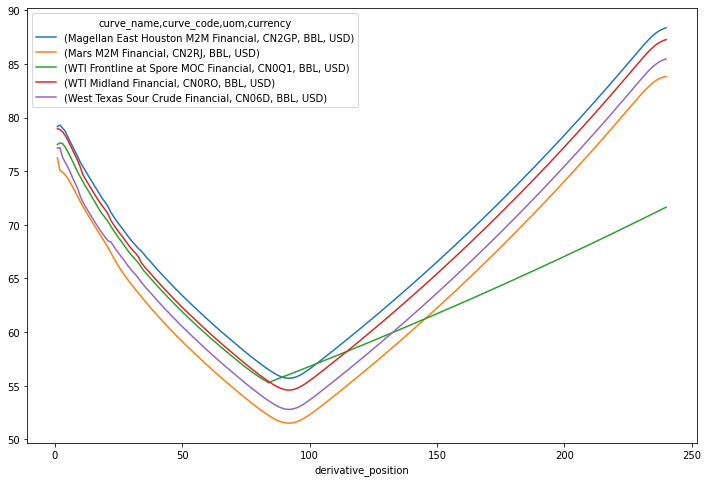

In [11]:
pt.plot(figsize=(12, 8));

## Getting 2 years of history for a single curve, grouping, plotting

In [12]:
start_dt = date(2021, 1, 1)
end_dt = date.today()
df_hist = fc.get_assessments(curve_code="CN006", assess_date_gte=start_dt, assess_date_lte=end_dt, derivative_maturity_frequency="Month", paginate=True)
df_hist.info()

Fetching...: 100%|██████████| 2/2 [00:00<00:00,  1.18it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19620 entries, 0 to 19619
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   symbol                         19620 non-null  object        
 1   curve_code                     19620 non-null  object        
 2   curve_name                     19620 non-null  object        
 3   derivative_maturity_frequency  19620 non-null  object        
 4   derivative_position            19620 non-null  float64       
 5   roll_date                      19620 non-null  datetime64[ns]
 6   expiry_date                    19620 non-null  datetime64[ns]
 7   contract_label                 19620 non-null  object        
 8   assessDate                     19620 non-null  datetime64[ns]
 9   value                          19620 non-null  float64       
 10  bate                           19620 non-null  object        
dtypes: datetime64[n

In [13]:
grp = df_hist.groupby([pd.Grouper(key="assessDate", freq="M")])
filt = grp['assessDate'].transform('min') == df_hist['assessDate']
df_grouped = df_hist[filt]
df_grouped.head()

,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,bate
0,BDLM001,CN006,Dated Brent Financial,Month,1.0,2021-01-04,2021-01-29,FEB 2021,2021-01-04,50.40,c
1,BDLM002,CN006,Dated Brent Financial,Month,2.0,2021-02-01,2021-02-26,MAR 2021,2021-01-04,50.48,c
2,BDLM003,CN006,Dated Brent Financial,Month,3.0,2021-03-01,2021-03-31,APR 2021,2021-01-04,50.53,c
3,BDLM004,CN006,Dated Brent Financial,Month,4.0,2021-04-01,2021-04-30,MAY 2021,2021-01-04,50.41,c
4,BDLM005,CN006,Dated Brent Financial,Month,5.0,2021-05-04,2021-05-28,JUN 2021,2021-01-04,50.30,c


In [14]:
pt = df_grouped.pivot_table(index="derivative_position", columns='assessDate', values='value')
pt

assessDate,2021-01-04,2021-02-01,2021-03-01,2021-04-01,2021-05-04,2021-06-01,2021-07-01,2021-08-02,2021-09-01,2021-10-01,...,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-03,2022-11-01,2022-12-01,2023-01-03,2023-02-01,2023-03-01
derivative_position,,,,,,,,,,,,,,,,,,,,,
1.0,50.40,55.31,64.24,62.31,68.13,69.90,75.11,72.48,70.32,78.12,...,117.38,111.55,99.28,92.02,87.51,94.25,87.15,82.34,83.53,82.73
2.0,50.48,55.08,63.64,62.03,67.78,69.46,74.30,71.81,69.77,77.37,...,114.44,106.99,96.82,91.01,86.15,92.37,87.11,82.31,83.36,82.38
3.0,50.53,54.78,62.94,61.76,67.30,68.94,73.56,71.09,69.28,76.56,...,111.96,103.92,95.19,90.09,84.52,90.85,87.13,82.22,83.31,82.06
4.0,50.41,54.46,62.39,61.37,66.81,68.43,72.79,70.49,68.79,75.93,...,109.59,101.34,93.86,88.98,83.29,89.40,86.90,82.12,83.07,81.69
5.0,50.30,54.15,61.88,60.98,66.32,67.95,72.15,69.82,68.42,75.38,...,107.53,99.43,92.50,88.17,81.91,88.26,86.64,81.93,82.80,81.28
6.0,50.22,53.84,61.39,60.54,65.86,67.51,71.52,69.39,68.08,74.75,...,105.56,97.45,91.55,87.36,80.98,87.49,86.45,81.61,82.32,80.81
7.0,50.08,53.55,60.98,60.19,65.44,67.04,71.04,68.99,67.66,74.23,...,103.70,96.27,90.65,86.90,80.28,86.90,86.05,81.07,81.84,80.34
8.0,49.95,53.27,60.59,59.86,65.02,66.68,70.59,68.55,67.33,73.73,...,102.13,94.99,90.07,86.35,79.68,85.80,85.52,80.57,81.35,79.86
9.0,49.83,53.03,60.21,59.52,64.68,66.35,70.10,68.17,67.01,73.24,...,100.77,94.21,89.43,85.80,79.04,85.21,85.05,80.14,80.91,79.38


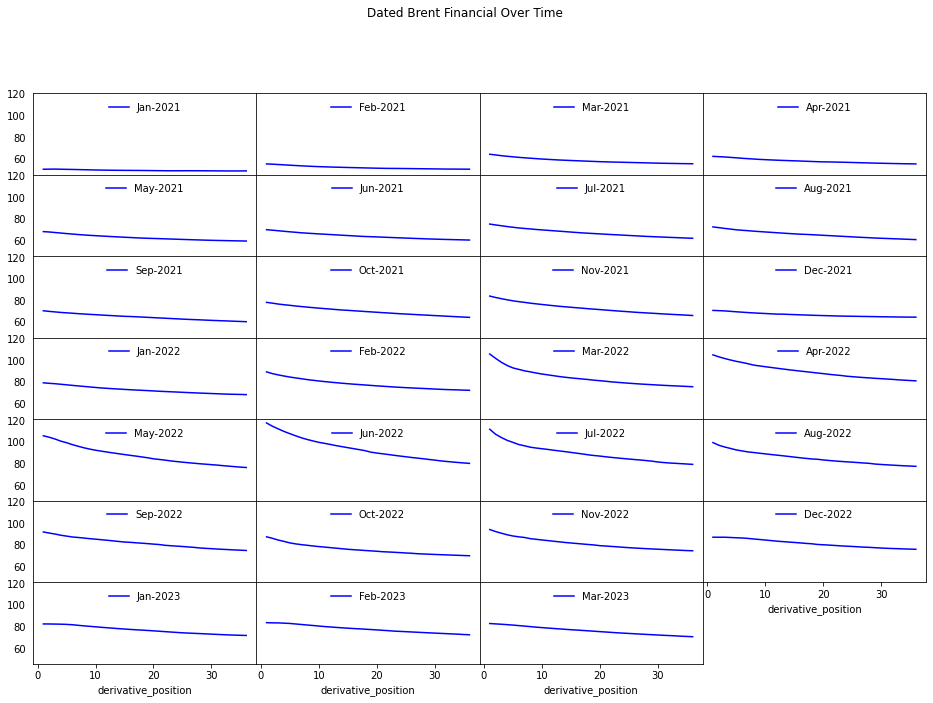

In [20]:
axes = pt.plot.line(subplots=True, layout=(8, 4), sharex=True, sharey=True, figsize=(16,12),title="Dated Brent Financial Over Time", color="blue");
plt.subplots_adjust(hspace=0, wspace=0)

for i, ax in enumerate(axes.flat):
    try:
        label = pt.columns[i].strftime("%b-%Y")
    except:
        label = ""
    ax.yaxis.set_ticks_position('none')
    ax.legend([label], frameon=False, loc='upper center')

## Combining with Energy Price Forecast

In [16]:
epf = ci.EnergyPriceForecast()

In [21]:
brent_forecast = epf.get_prices_shortterm(symbol="PCAAS00", sector="Crude", year_gte=2023)
brent_forecast.head()

,year,month,categoryName,groupName,priceName,priceSymbol,price,unitName,unitId,currencySymbol,...,priceCategoryCode,priceGroupCode,currencyCode,modifiedDate,sectorId,sectorName,deliveryRegionId,deliveryRegionName,commodityId,commodityName
0,2024,12,Oil,Crude,Dated Brent,PCAAS00,85.0,BBL,1,USD,...,1,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil
1,2024,11,Oil,Crude,Dated Brent,PCAAS00,84.0,BBL,1,USD,...,1,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil
2,2024,10,Oil,Crude,Dated Brent,PCAAS00,84.0,BBL,1,USD,...,1,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil
3,2024,9,Oil,Crude,Dated Brent,PCAAS00,85.0,BBL,1,USD,...,1,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil
4,2024,8,Oil,Crude,Dated Brent,PCAAS00,86.0,BBL,1,USD,...,1,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil


In [28]:
brent_forecast['date'] = pd.to_datetime(brent_forecast['month'].astype(str) + "/" + brent_forecast['year'].astype(str))
brent_forecast.head()

,year,month,categoryName,groupName,priceName,priceSymbol,price,unitName,unitId,currencySymbol,...,priceGroupCode,currencyCode,modifiedDate,sectorId,sectorName,deliveryRegionId,deliveryRegionName,commodityId,commodityName,date
0,2024,12,Oil,Crude,Dated Brent,PCAAS00,85.0,BBL,1,USD,...,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil,2024-12-01
1,2024,11,Oil,Crude,Dated Brent,PCAAS00,84.0,BBL,1,USD,...,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil,2024-11-01
2,2024,10,Oil,Crude,Dated Brent,PCAAS00,84.0,BBL,1,USD,...,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil,2024-10-01
3,2024,9,Oil,Crude,Dated Brent,PCAAS00,85.0,BBL,1,USD,...,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil,2024-09-01
4,2024,8,Oil,Crude,Dated Brent,PCAAS00,86.0,BBL,1,USD,...,1,0,2023-01-31,10,Crude,61,North Sea,15,Crude oil,2024-08-01


In [29]:
brent_fc = fc.get_assessments(curve_code="CN006", assess_date=date(2023, 1, 31), derivative_maturity_frequency="Month")
brent_fc.head()

,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,bate
0,BDLM001,CN006,Dated Brent Financial,Month,1.0,2023-01-03,2023-01-31,FEB 2023,2023-01-31,84.61,c
1,BDLM002,CN006,Dated Brent Financial,Month,2.0,2023-02-01,2023-02-28,MAR 2023,2023-01-31,84.45,c
2,BDLM003,CN006,Dated Brent Financial,Month,3.0,2023-03-01,2023-03-31,APR 2023,2023-01-31,84.22,c
3,BDLM004,CN006,Dated Brent Financial,Month,4.0,2023-04-03,2023-04-28,MAY 2023,2023-01-31,84.16,c
4,BDLM005,CN006,Dated Brent Financial,Month,5.0,2023-05-02,2023-05-31,JUN 2023,2023-01-31,83.86,c


In [30]:
brent_fc['label_to_date'] = pd.to_datetime(brent_fc['contract_label'])
brent_fc.head()

,symbol,curve_code,curve_name,derivative_maturity_frequency,derivative_position,roll_date,expiry_date,contract_label,assessDate,value,bate,label_to_date
0,BDLM001,CN006,Dated Brent Financial,Month,1.0,2023-01-03,2023-01-31,FEB 2023,2023-01-31,84.61,c,2023-02-01
1,BDLM002,CN006,Dated Brent Financial,Month,2.0,2023-02-01,2023-02-28,MAR 2023,2023-01-31,84.45,c,2023-03-01
2,BDLM003,CN006,Dated Brent Financial,Month,3.0,2023-03-01,2023-03-31,APR 2023,2023-01-31,84.22,c,2023-04-01
3,BDLM004,CN006,Dated Brent Financial,Month,4.0,2023-04-03,2023-04-28,MAY 2023,2023-01-31,84.16,c,2023-05-01
4,BDLM005,CN006,Dated Brent Financial,Month,5.0,2023-05-02,2023-05-31,JUN 2023,2023-01-31,83.86,c,2023-06-01


In [38]:
joined = brent_fc.merge(brent_forecast, left_on='label_to_date', right_on='date', how='left')
joined = joined[['contract_label', 'value', 'price', 'label_to_date']]
joined.columns = ['contract_label', 'value', 'forecast', 'date']
joined.head()


,contract_label,value,forecast,date
0,FEB 2023,84.61,83.0,2023-02-01
1,MAR 2023,84.45,81.0,2023-03-01
2,APR 2023,84.22,80.0,2023-04-01
3,MAY 2023,84.16,81.0,2023-05-01
4,JUN 2023,83.86,84.0,2023-06-01


<AxesSubplot: xlabel='date'>

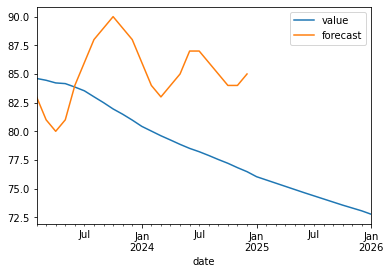

In [39]:
joined.plot(x='date', y=['value', 'forecast'])